In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
pd.options.display.float_format = '{:,.2f}'.format

bike_time = pd.read_csv('seoul_bike_time_2212.csv', encoding='cp949')

bike_time.rename(columns={"이동거리(M)":"이동거리"}, inplace=True)
bike_time.rename(columns={"이용시간(분)":"이용시간"}, inplace=True)

#  이용시간==0, 이동거리==0, 이용건수>1, 대여구분코드=단체권
bike = bike_time.dropna()
bike_del = bike[(bike["이용시간"]==0)|(bike["이동거리"]==0)|(bike["이용건수"]>1)
            |(bike["대여구분코드"]=="단체권")].index
bike=bike.drop(bike_del)
bike


,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
282,2022-12-01,0,1667,1667. 중계중학교,정기권,F,~10대,1,16.41,0.15,637.43,4
284,2022-12-01,0,1167,1167. 마곡수명산파크3단지 교차로,정기권,F,~10대,1,15.51,0.21,890.00,4
285,2022-12-01,0,427,427. 성산시영아파트,정기권,F,~10대,1,14.85,0.16,681.79,5
287,2022-12-01,0,786,786.목동아파트 8단지 상가동 앞,정기권,F,~10대,1,23.99,0.31,"1,317.25",10
288,2022-12-01,0,1465,1465.중랑공영차고지 옆,정기권,F,~10대,1,9.49,0.12,510.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1638964,2022-12-31,23,262,262. 영문초등학교 사거리,정기권,M,기타,1,29.15,0.21,920.00,5
1638965,2022-12-31,23,201,201. 진미파라곤 앞,정기권,M,기타,1,15.36,0.10,430.88,3
1638966,2022-12-31,23,1008,1008. 암사역 3번출구(국민은행앞),정기권,M,기타,1,36.83,0.29,"1,240.00",7
1638967,2022-12-31,23,1637,1637. KT 전화국 버스정류장 옆,정기권,M,기타,1,222.14,2.00,"8,630.00",87


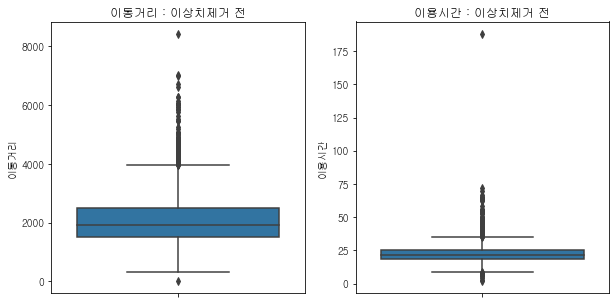

In [5]:
# # 클러스터분석 파일 만들기


# a = pd.DataFrame(columns=["대여소번호", "대여소명", "이동거리", "이용시간", "개수"])
# a["대여소명"] = bike["대여소명"].unique()

# for index, row in a.iterrows():
#     row["대여소번호"] = row["대여소명"].split(".")[0]
#     time = bike[bike["대여소명"]==row["대여소명"]]["이용시간"].std()
#     distance = bike[bike["대여소명"]==row["대여소명"]]["이동거리"].std()
#     name_count = bike[bike["대여소명"]==row["대여소명"]]["대여소명"].count()

#     row["이용시간"] = time
#     row["이동거리"] = distance
#     row["개수"] = name_count

# a.to_excel('bike_cluster.xlsx')
# a

bike_cluster = pd.read_excel('bike_cluster.xlsx', encoding='cp949')

# 이상치제거 전
fig = plt.figure(figsize=(10,5))
title1 = fig.add_subplot(1,2,1)
title1.set_title('이동거리 : 이상치제거 전')

title2 = fig.add_subplot(1,2,2)
title2.set_title('이용시간 : 이상치제거 전')

sns.boxplot(data=bike_cluster, y="이동거리", ax = title1)
sns.boxplot(data=bike_cluster, y="이용시간", ax = title2)

plt.savefig('boxplot.png')

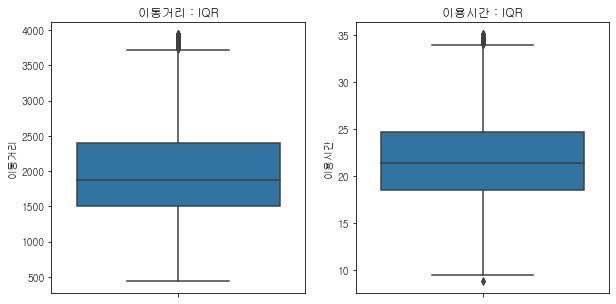

In [6]:
# 운동량 iqr 값
q3 = bike_cluster["이동거리"].quantile(0.75)
q1 = bike_cluster["이동거리"].quantile(0.25)
iqr = q3 - q1
outlier_top = q3 + 1.5 * iqr
outlier_bottom = q1 - 1.5 * iqr

# 이용시간 iqr 값
q3_time = bike_cluster["이용시간"].quantile(0.75)
q1_time = bike_cluster["이용시간"].quantile(0.25)
iqr_time = q3_time - q1_time
outlier_top_time = q3_time + 1.5 * iqr_time
outlier_bottom_time = q1_time - 1.5 * iqr_time

idx = bike_cluster[(bike_cluster["이동거리"]<outlier_bottom)|(bike_cluster["이동거리"]>outlier_top)|
           (bike_cluster["이용시간"]<outlier_bottom_time)|(bike_cluster["이용시간"]>outlier_top_time)].index
bike = bike_cluster.drop(idx)
bike=bike.dropna()

# iqr 확인

fig = plt.figure(figsize=(10,5))
title1 = fig.add_subplot(1,2,1)
title1.set_title('이동거리 : IQR')

title2 = fig.add_subplot(1,2,2)
title2.set_title('이용시간 : IQR')

sns.boxplot(data=bike, y="이동거리", ax = title1)
sns.boxplot(data=bike, y="이용시간", ax = title2)

plt.savefig('boxplot_iqr.png')

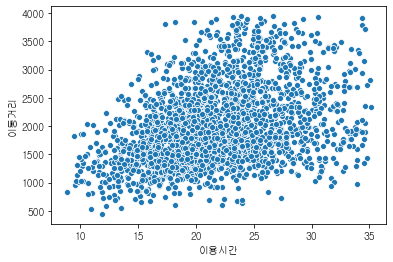

In [7]:
sns.scatterplot(x=bike["이용시간"], y=bike["이동거리"])

plt.savefig('scatterplot.png')

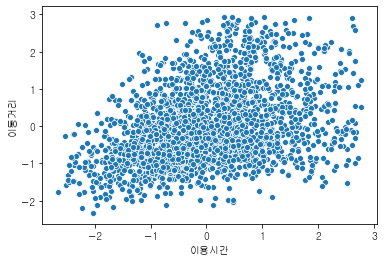

In [8]:
## 데이터 표준화
bike1 = bike[["이용시간", "이동거리"]]

bike_mean = bike1.mean()
bike_std = bike1.std()

bike1 = (bike1-bike_mean)/bike_std

bike1.columns = ["이용시간", "이동거리"]
bike1.index = bike1.index

bike["이용시간:표준화"] = bike1["이용시간"]
bike["이동거리:표준화"] = bike1["이동거리"]

sns.scatterplot(x=bike1["이용시간"], y=bike1["이동거리"])

plt.savefig('scatterplot_standardization.png')

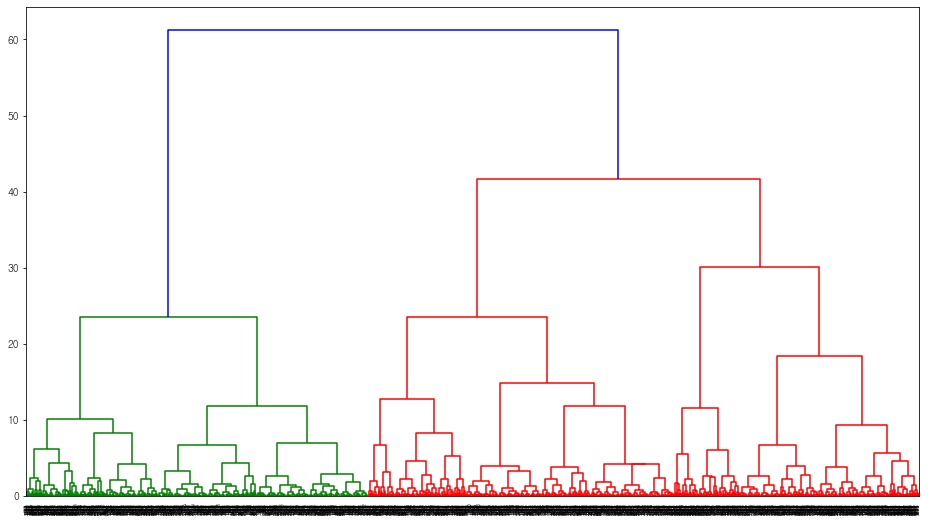

<Figure size 432x288 with 0 Axes>

In [9]:
# 계층 클러스터링/ scipy 라이브러리
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

model = linkage(bike1, method='ward')
label_list = bike1.index

plt.figure(figsize=(16, 9))

dendrogram(model, labels=label_list)
plt.show()

plt.savefig('Hierachical_clustering.png')

In [10]:
cluster_num = 4
bike1["label"]=cut_tree(model, cluster_num)
bike["label"]=cut_tree(model, cluster_num)
pd.DataFrame(bike1["label"].value_counts())



,label
1,954
0,852
2,500
3,179


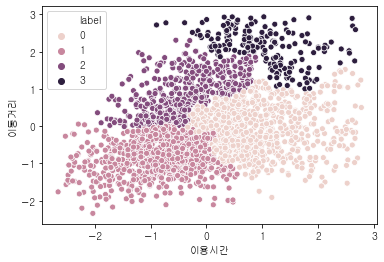

In [11]:
sns.scatterplot(x=bike1["이용시간"], y=bike1["이동거리"], hue=bike1["label"])

plt.savefig('scatterplot_clustering.png')

In [12]:
groupby_bike = bike[["이용시간", "이동거리", "label"]].groupby('label').mean()
groupby_bike

# dfi.export(groupby_bike, 'groupby_bike.png', max_cols=-1, max_rows=-1)

,이용시간,이동거리
label,,
0,25.72,"1,950.51"
1,18.01,"1,467.72"
2,20.01,"2,578.73"
3,26.67,"3,408.63"
